In [40]:
install.packages("GGally")
install.packages("corrplot")
install.packages("PerformanceAnalytics")
library(PerformanceAnalytics)
library(tidyverse)
library(ggplot2)
library(GGally)
library(gridExtra)
library(forcats)
library(corrplot)

Warning message:
"package 'GGally' is in use and will not be installed"
Warning message:
"package 'corrplot' is in use and will not be installed"
Warning message:
"package 'PerformanceAnalytics' is in use and will not be installed"


# <font color='#ED45A6'> Trabajo del Tema 5 </font>

**PARTE I**

Imagina que te llega un conjunto de datos que contiene tres variables categóricas A,B y C (con 2 categorías cada una). ¿Podrías plantear una estrategia que recoja los 3 factores realizando un Two-Way ANOVA? ¿y un One-Way ANOVA? ¿Qué consideraciones tendrías en cuenta al diseñar estos análisis? (2pt)

No se podría plantear un Two-Way ANOVA o un One-Way ANOVA directamente, tendriamos que buscar separar los tres factores de a uno o de a dos, y luego si realizar por ejemplo una prueba One-Way ANOVA para uno de los Factores en una variable dependiente o un Two-Way ANOVA para dos de los Factores en una variable dependiente. 

Antes de diseñar el análisis tenemos que evaluar que se cumplan los siguientes supuestos porque precisamos que la media y la dispersión de los datos sea similar entre los grupos y que las observaciones sean independientes unas de otras.

- **Independencia en las muestras**: muestras tomadas de forma independiente sin depender de ninguna otra observación. 
- **Distribución normal** por categorías
- **Homogeneidad de varianzas (Homocedasticidad)** Las varianzas de las poblaciones subyacentes deben ser aproximadamente iguales para todos los grupos.
- **Mediciones a intervalos o de razón** Las variables dependientes deben medirse a una escala de intervalo o de razón.
- **Aleatoriedad** Las muestras deben ser seleccionadas al azar de la población que se está estudiando.

**PARTE II**

Se dispone del siguiente dataset que contiene en formato csv registros de diferentes deportistas y donde se recoge el valor de las siguientes variables teniendo como factores deporte y género:

• rcc: glóbulos rojos
• wcc: células blancas en la sangre
• hc: hematocritos(%)
• hg: concentración de hemoglobina, en gr por decalitro
• bmi: índice masa corporal
• sex: 2 categorías >> f m
• sport: 9 categorías >> B_Ball Netball Row Swim T_400m T_Sprnt Tennis W_Polo

(selección de origen:202401_ais.csv)
Se pide:

1. Visualización y comprensión del dataset (2p): Se pide visualizar y realizar estadísticos
que ayuden a comprender mejor el dataset dentro del dominio de ANOVA: Análisis
descriptivo de las variables continuas y de nuestros factores y análisis de correlaciones
2. Calcular la prueba ANOVA One-Way para la variable sport respecto 2 variables
continuas (escoged). Interpretar resultados y acompañar con los gráficos vistos en clase
(3p)
3. Calcular la prueba ANOVA Two-Way con ambos factores respecto 2 variables
continuas (diferentes a las anteriores): comentad todo lo que observeis, ¿es sport
significativa?¿y sex? ¿y conjuntamente? (3p)
Recuerda realizar un apartado de conclusiones que recoja las principales
observaciones a lo largo del ejercicio.


In [41]:
data = read.csv(file="202401_ais.csv", header=TRUE, sep=';', dec='.')
head(data)#de forma predefinida retorna las primeras 6 observations
tail(data)#de forma predefinida retorna las últimas 6 observations

,rownames,rcc,wcc,hc,hg,bmi,sex,sport
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,1,3.96,7.5,37.5,12.3,20.56,f,B_Ball
2,2,4.41,8.3,38.2,12.7,20.67,f,B_Ball
3,3,4.14,5.0,36.4,11.6,21.86,f,B_Ball
4,4,4.11,5.3,37.3,12.6,21.88,f,B_Ball
5,5,4.45,6.8,41.5,14.0,18.96,f,B_Ball
6,6,4.10,4.4,37.4,12.5,21.04,f,B_Ball


,rownames,rcc,wcc,hc,hg,bmi,sex,sport
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
119,173,5.49,5.9,47.7,15.9,22.28,m,T_400m
120,175,5.03,6.6,44.7,15.9,19.85,m,T_400m
121,199,5.66,8.3,50.2,17.7,23.76,m,Tennis
122,200,5.03,6.4,42.7,14.3,22.01,m,Tennis
123,201,4.97,8.8,43.0,14.9,22.34,m,Tennis
124,202,5.38,6.3,46.0,15.7,21.07,m,Tennis


In [42]:
any(is.na(data))

[1] FALSE

No tenemos NAs en el dataset. 

In [43]:
dim(data)

[1] 124   8

In [44]:
str(data)

'data.frame':	124 obs. of  8 variables:
 $ rownames: int  1 2 3 4 5 6 7 8 9 10 ...
 $ rcc     : num  3.96 4.41 4.14 4.11 4.45 4.1 4.31 4.42 4.3 4.51 ...
 $ wcc     : num  7.5 8.3 5 5.3 6.8 4.4 5.3 5.7 8.9 4.4 ...
 $ hc      : num  37.5 38.2 36.4 37.3 41.5 37.4 39.6 39.9 41.1 41.6 ...
 $ hg      : num  12.3 12.7 11.6 12.6 14 12.5 12.8 13.2 13.5 12.7 ...
 $ bmi     : num  20.6 20.7 21.9 21.9 19 ...
 $ sex     : chr  "f" "f" "f" "f" ...
 $ sport   : chr  "B_Ball" "B_Ball" "B_Ball" "B_Ball" ...


In [45]:
data$sex <- as.factor(data$sex)#Cambio las variables categóricas a factores.
data$sport <- as.factor(data$sport)
str(data)

'data.frame':	124 obs. of  8 variables:
 $ rownames: int  1 2 3 4 5 6 7 8 9 10 ...
 $ rcc     : num  3.96 4.41 4.14 4.11 4.45 4.1 4.31 4.42 4.3 4.51 ...
 $ wcc     : num  7.5 8.3 5 5.3 6.8 4.4 5.3 5.7 8.9 4.4 ...
 $ hc      : num  37.5 38.2 36.4 37.3 41.5 37.4 39.6 39.9 41.1 41.6 ...
 $ hg      : num  12.3 12.7 11.6 12.6 14 12.5 12.8 13.2 13.5 12.7 ...
 $ bmi     : num  20.6 20.7 21.9 21.9 19 ...
 $ sex     : Factor w/ 2 levels "f","m": 1 1 1 1 1 1 1 1 1 1 ...
 $ sport   : Factor w/ 5 levels "B_Ball","Row",..: 1 1 1 1 1 1 1 1 1 1 ...


El dataset para este caso práctico consta de 124 observaciones con un total de 8 variables, siendo 2 de ellas factores (categóricas)

# <font color='#ED45A6'>  2. REALIZAR ANÁLISIS DESCRIPTIVO </font>

# <font color='#ED45A6'>  2.1 Variables numéricas </font>

In [46]:
data_numericas = data  %>% 
 select_if(is.numeric)
data_numericas = data_numericas[, c('rcc','wcc','hc','hg','bmi')]
head(data_numericas)#de forma predefinida retorna las primeras 6 observations
tail(data_numericas)#de forma predefinida retorna las últimas 6 observations

,rcc,wcc,hc,hg,bmi
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,3.96,7.5,37.5,12.3,20.56
2,4.41,8.3,38.2,12.7,20.67
3,4.14,5.0,36.4,11.6,21.86
4,4.11,5.3,37.3,12.6,21.88
5,4.45,6.8,41.5,14.0,18.96
6,4.10,4.4,37.4,12.5,21.04


,rcc,wcc,hc,hg,bmi
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
119,5.49,5.9,47.7,15.9,22.28
120,5.03,6.6,44.7,15.9,19.85
121,5.66,8.3,50.2,17.7,23.76
122,5.03,6.4,42.7,14.3,22.01
123,4.97,8.8,43.0,14.9,22.34
124,5.38,6.3,46.0,15.7,21.07


In [47]:
summary(data_numericas)

      rcc             wcc               hc              hg       
 Min.   :3.900   Min.   : 3.300   Min.   :36.40   Min.   :11.60  
 1st Qu.:4.360   1st Qu.: 5.800   1st Qu.:40.98   1st Qu.:13.78  
 Median :4.695   Median : 6.600   Median :43.15   Median :14.60  
 Mean   :4.676   Mean   : 6.613   Mean   :43.00   Mean   :14.52  
 3rd Qu.:5.005   3rd Qu.: 7.500   3rd Qu.:45.23   3rd Qu.:15.40  
 Max.   :5.660   Max.   :10.100   Max.   :50.20   Max.   :17.70  
      bmi       
 Min.   :16.75  
 1st Qu.:20.80  
 Median :22.33  
 Mean   :22.29  
 3rd Qu.:23.73  
 Max.   :26.79  

Con solo ver los estadísticos podemos inferir que las distribuciones aparentan ser normales porque la media esta cerca de los valores del primer cuartil (Q1) del segundo cuartil (Q2) 

In [48]:
#Calculamos la media y la desviación estándar para cada una de las variables númericas.
data_numericas %>%
    summarize(m_rcc = mean(rcc), sd_rcc = sd(rcc) 
             , m_wcc = mean(wcc), sd_wcc = sd(wcc)
             , m_hc = mean(hc), sd_hc = sd(hc)
             , m_hg = mean(hg), sd_hg = sd(hg)
             , m_bmi = mean(bmi), sd_bmi = sd(bmi))

m_rcc,sd_rcc,m_wcc,sd_wcc,m_hc,sd_hc,m_hg,sd_hg,m_bmi,sd_bmi
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4.675726,0.4095728,6.612903,1.385697,42.99597,3.06253,14.51532,1.201019,22.29234,2.108925


In [49]:
data_summary = data %>%
  group_by(sex) %>%
      summarize(m_rcc = mean(rcc), sd_rcc = sd(rcc),
             m_wcc = mean(wcc), sd_wcc = sd(wcc),
             m_hc = mean(hc), sd_hc = sd(hc),
             m_hg = mean(hg), sd_hg = sd(hg),
             m_bmi = mean(bmi), sd_bmi = sd(bmi))
data_summary

sex,m_rcc,sd_rcc,m_wcc,sd_wcc,m_hc,sd_hc,m_hg,sd_hg,m_bmi,sd_bmi
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
f,4.404032,0.3003084,6.540323,1.358092,40.92097,2.396660,13.67258,0.8907851,21.58952,2.062748
m,4.947419,0.3130649,6.685484,1.420095,45.07097,2.101318,15.35806,0.8193457,22.99516,1.925875


In [50]:
diference = data %>%
      summarize(sex = "diff_sp",
             m_rcc = mean(rcc), sd_rcc = sd(rcc),
             m_wcc = mean(wcc), sd_wcc = sd(wcc),
             m_hc = mean(hc), sd_hc = sd(hc),
             m_hg = mean(hg), sd_hg = sd(hg),
             m_bmi = mean(bmi), sd_bmi = sd(bmi))
data_m_sd = bind_rows(data_summary, diference)
data_m_sd

sex,m_rcc,sd_rcc,m_wcc,sd_wcc,m_hc,sd_hc,m_hg,sd_hg,m_bmi,sd_bmi
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
f,4.404032,0.3003084,6.540323,1.358092,40.92097,2.396660,13.67258,0.8907851,21.58952,2.062748
m,4.947419,0.3130649,6.685484,1.420095,45.07097,2.101318,15.35806,0.8193457,22.99516,1.925875
diff_sp,4.675726,0.4095728,6.612903,1.385697,42.99597,3.062530,14.51532,1.2010188,22.29234,2.108925


Observamos que comparando la media y la desviación estándar de los grupos femenino y masculino hay diferencias.

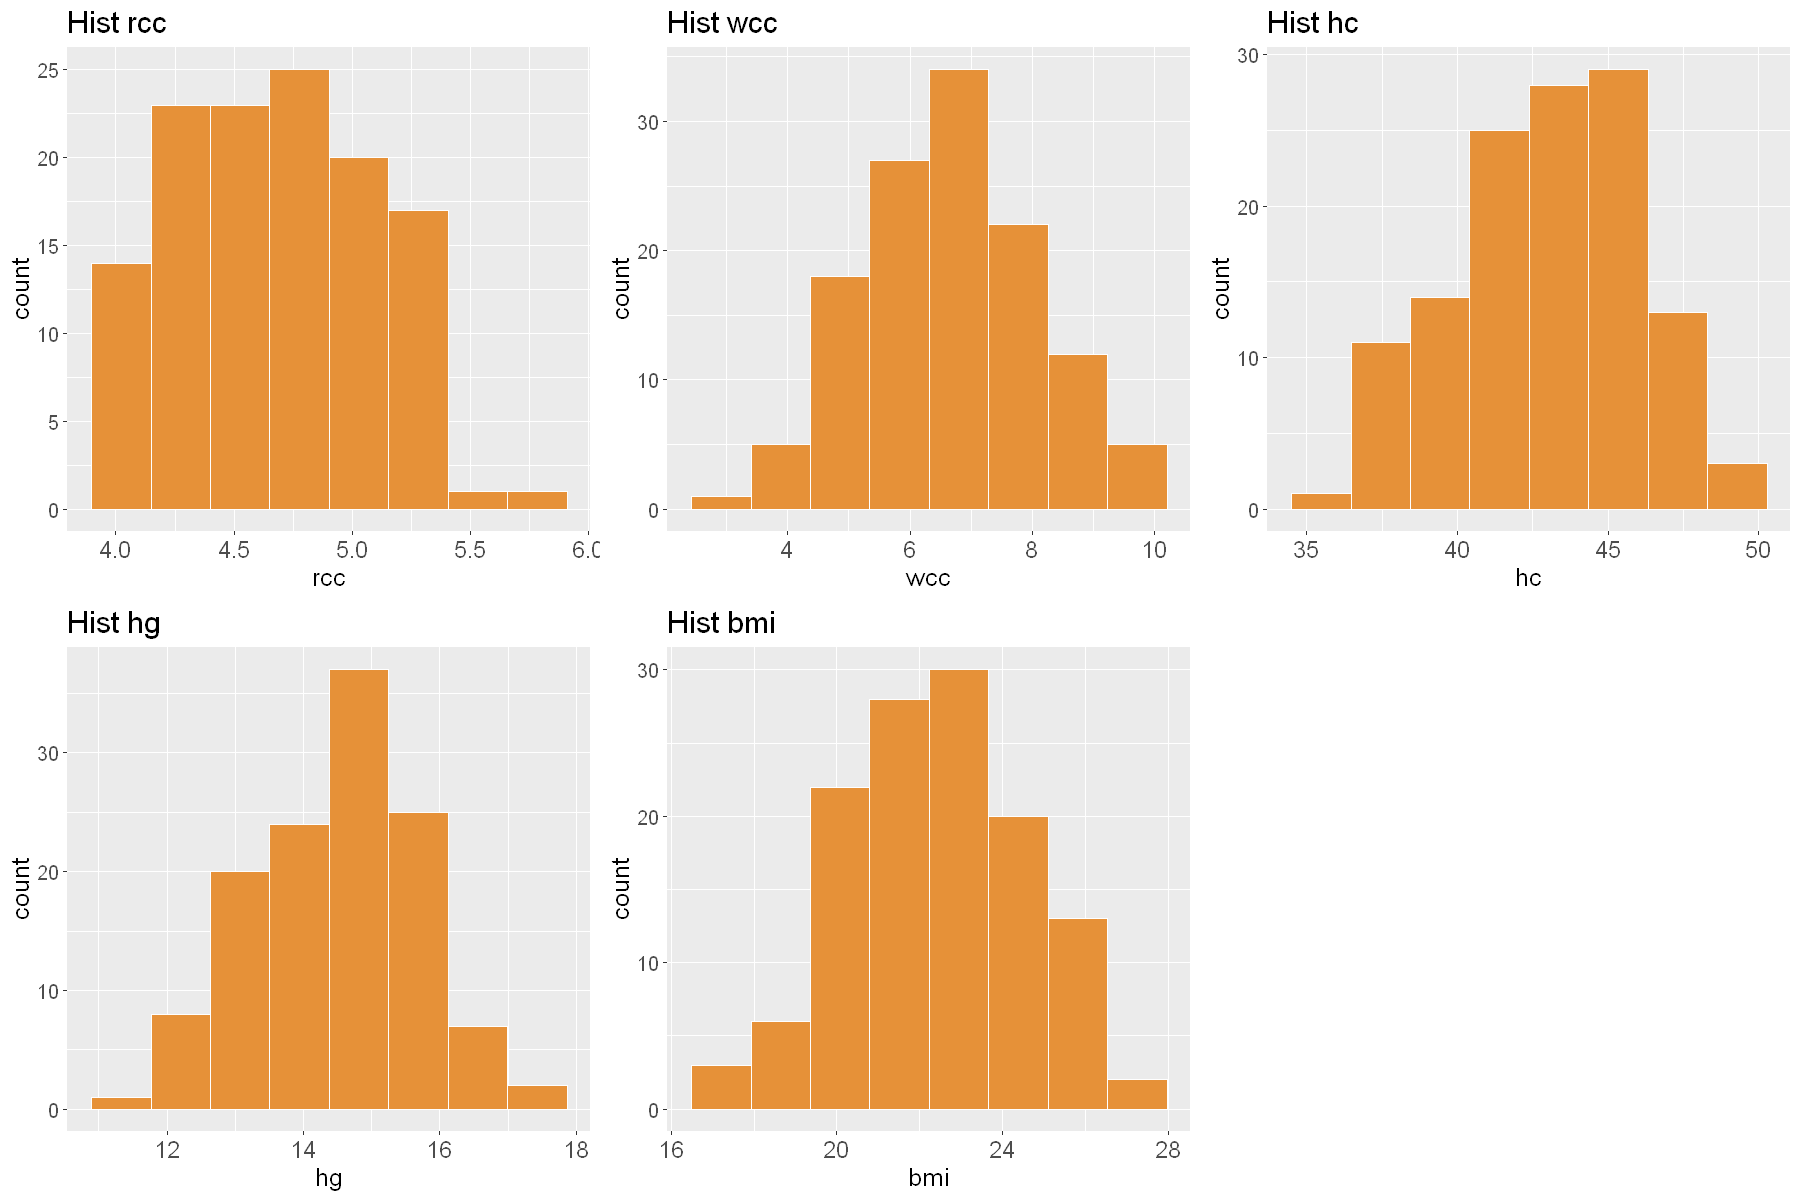

In [51]:
graficos_histograma = list()
var_data = colnames(data_numericas)

for (variable in var_data) {

  grafico = ggplot(data_numericas) +
    aes_string(x = variable) +
    geom_histogram(bins = 8, fill = '#e69138', color = 'white', na.rm = TRUE) +
    theme(text = element_text(size = 15), axis.text.x = element_text(size = 14)) + 
    labs(title = paste('Hist', variable))
  

  graficos_histograma[[length(graficos_histograma) + 1]] = grafico
}

options(
  repr.plot.width = 15,  
  repr.plot.height = 10  
)

# Mostrar los histogramas en un grid
do.call('grid.arrange', c(graficos_histograma, ncol = 3))

A simple vista podemos observar que las distribuciones son normales.

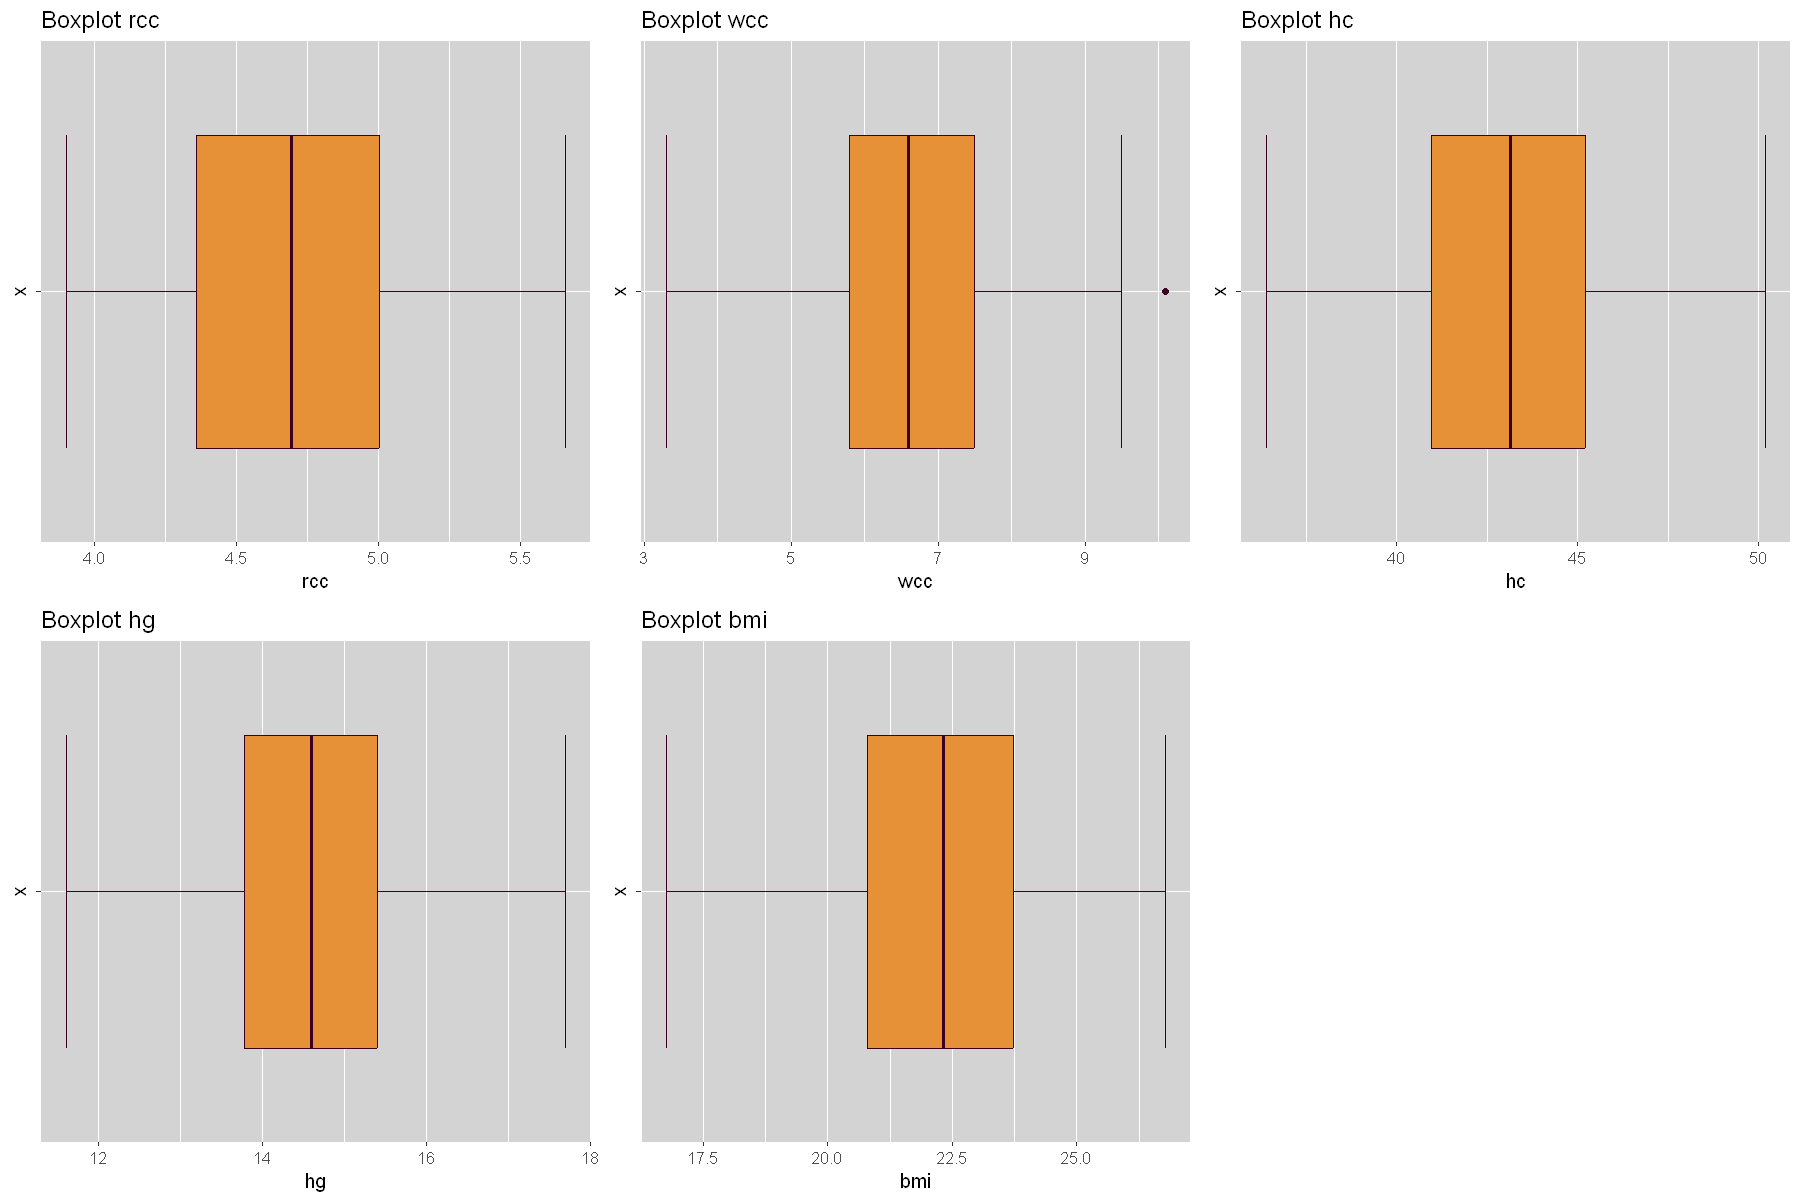

In [52]:
box_plots = list()
var_data = colnames(data_numericas)

for (variable in var_data) {
  box_plot = ggplot(data_numericas, aes(x = '', y = !!sym(variable))) +
    stat_boxplot(geom = 'errorbar', color = '#3c0023', na.rm = TRUE) +
    geom_boxplot(fill = '#e69138', color = '#3c0023', na.rm = TRUE) +
    coord_flip() +
    labs(title = paste('Boxplot', variable), y = variable) +
    theme(panel.background = element_rect(fill = 'lightgray'),
        panel.grid.major = element_line(color = 'white'),
        panel.grid.minor = element_line(color = 'white')) +
    theme(text = element_text(size = 12))
  box_plots[[variable]] = box_plot
}

options(
  repr.plot.width = 15,  
  repr.plot.height = 10 
)
grid.arrange(grobs = box_plots, ncol = 3, widths = rep(2, 3))

En los boxplots de nuestras variables observamos una distribución normal y no tienen outliers con excepción de la variable "wcc" que tiene un outlier en el extremo superior (fuera de los bigotes).

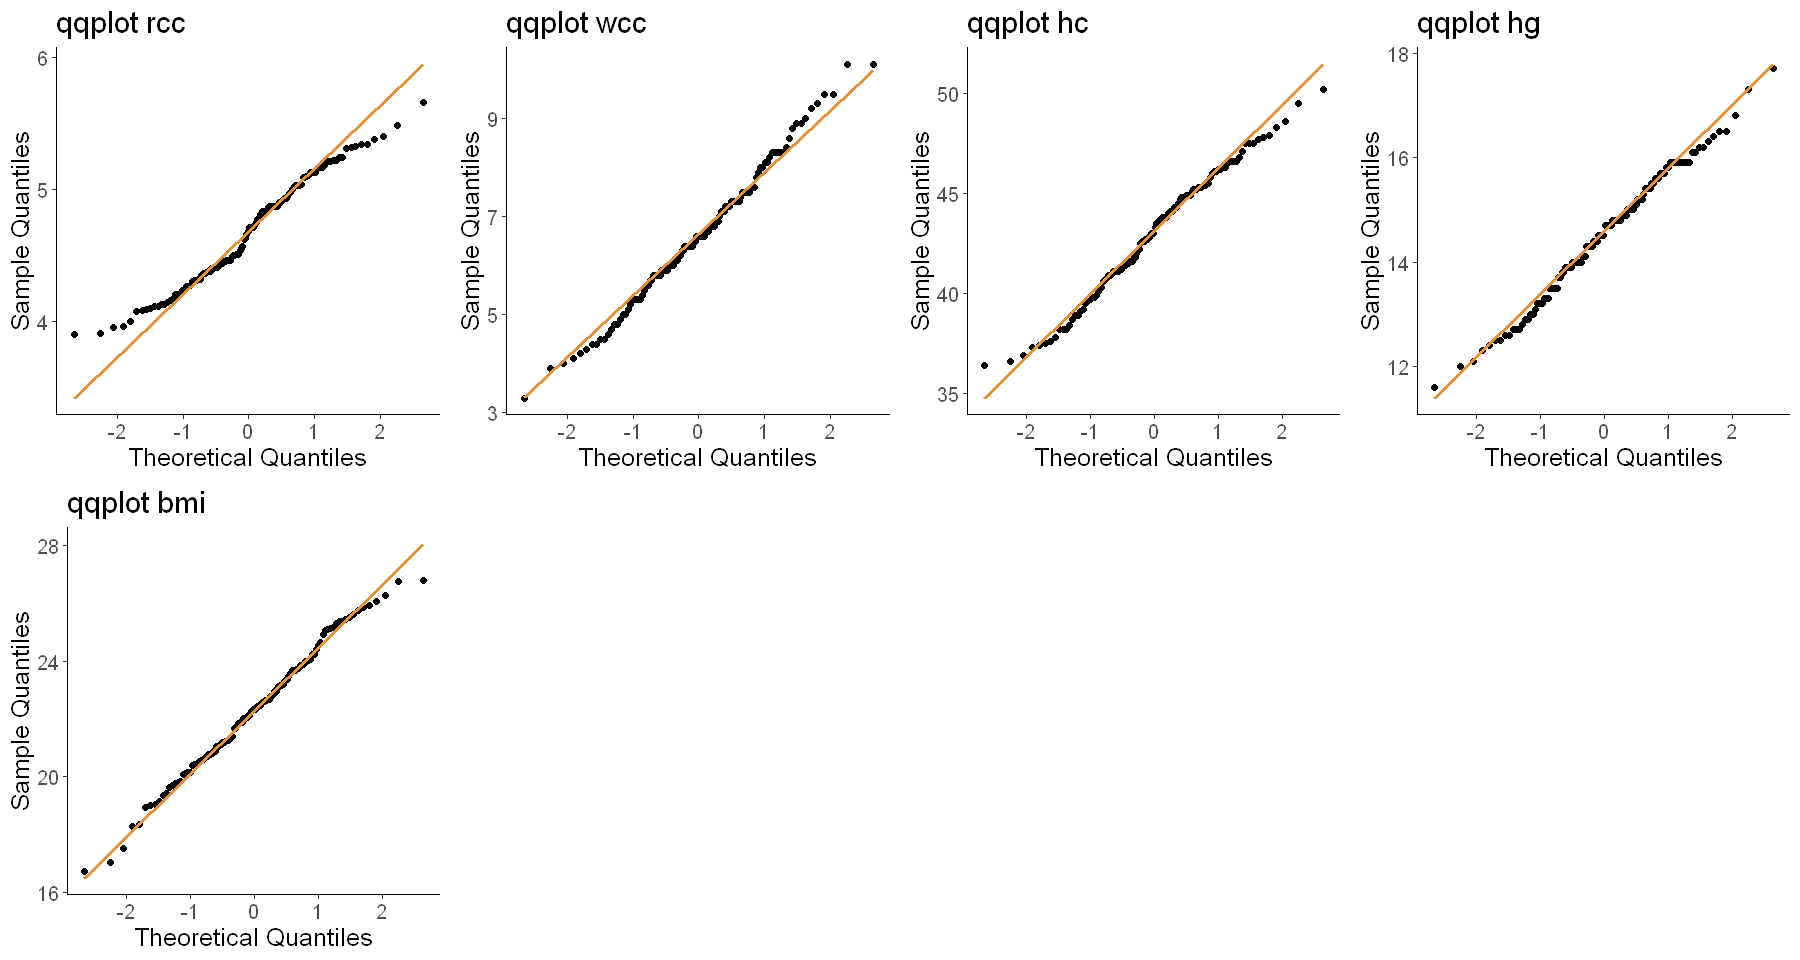

In [53]:
options(
  repr.plot.width = 15,  
  repr.plot.height = 8  
)
qq_plots = list()
var_data = colnames(data_numericas)

for (i in seq_along(var_data)) {
  variable = var_data[i]
  qq_plot = ggplot(data_numericas[!is.na(data_numericas[[variable]]), ],aes(sample = !!sym(variable))) +
    stat_qq() +
    stat_qq_line(color ='#e69138', lwd = 1) +
    labs(title = paste('qqplot', variable),
         x = 'Theoretical Quantiles',
         y = 'Sample Quantiles') +
    theme_classic() +
    theme(text = element_text(size = 15))
  qq_plots[[i]] = qq_plot
}

grid.arrange(grobs = qq_plots, ncol = 4, widths = rep(2, 4))

Con los qqplot podemos observar que las variables siguen una distribución normal.

# <font color='#ED45A6'>  2.1 Variables categóricas </font>

In [54]:
#descarto la variable ID para este análisis
data_cat = data %>%
  select_if(is.factor)
head(data_cat)

,sex,sport
,<fct>,<fct>
1,f,B_Ball
2,f,B_Ball
3,f,B_Ball
4,f,B_Ball
5,f,B_Ball
6,f,B_Ball


In [55]:
col_cat = c('sex','sport')
null_counts = colSums(is.na(data_cat[, col_cat]))
print(data.frame(Nulos = null_counts))

      Nulos
sex       0
sport     0


Vemos que ninguna de las variables ha llegado con datos nulos.

In [56]:
Conteo_grupo <- table(data_cat)
Conteo_grupo

   sport
sex B_Ball Row Swim T_400m Tennis
  f     13  22    9     11      7
  m     12  15   13     18      4

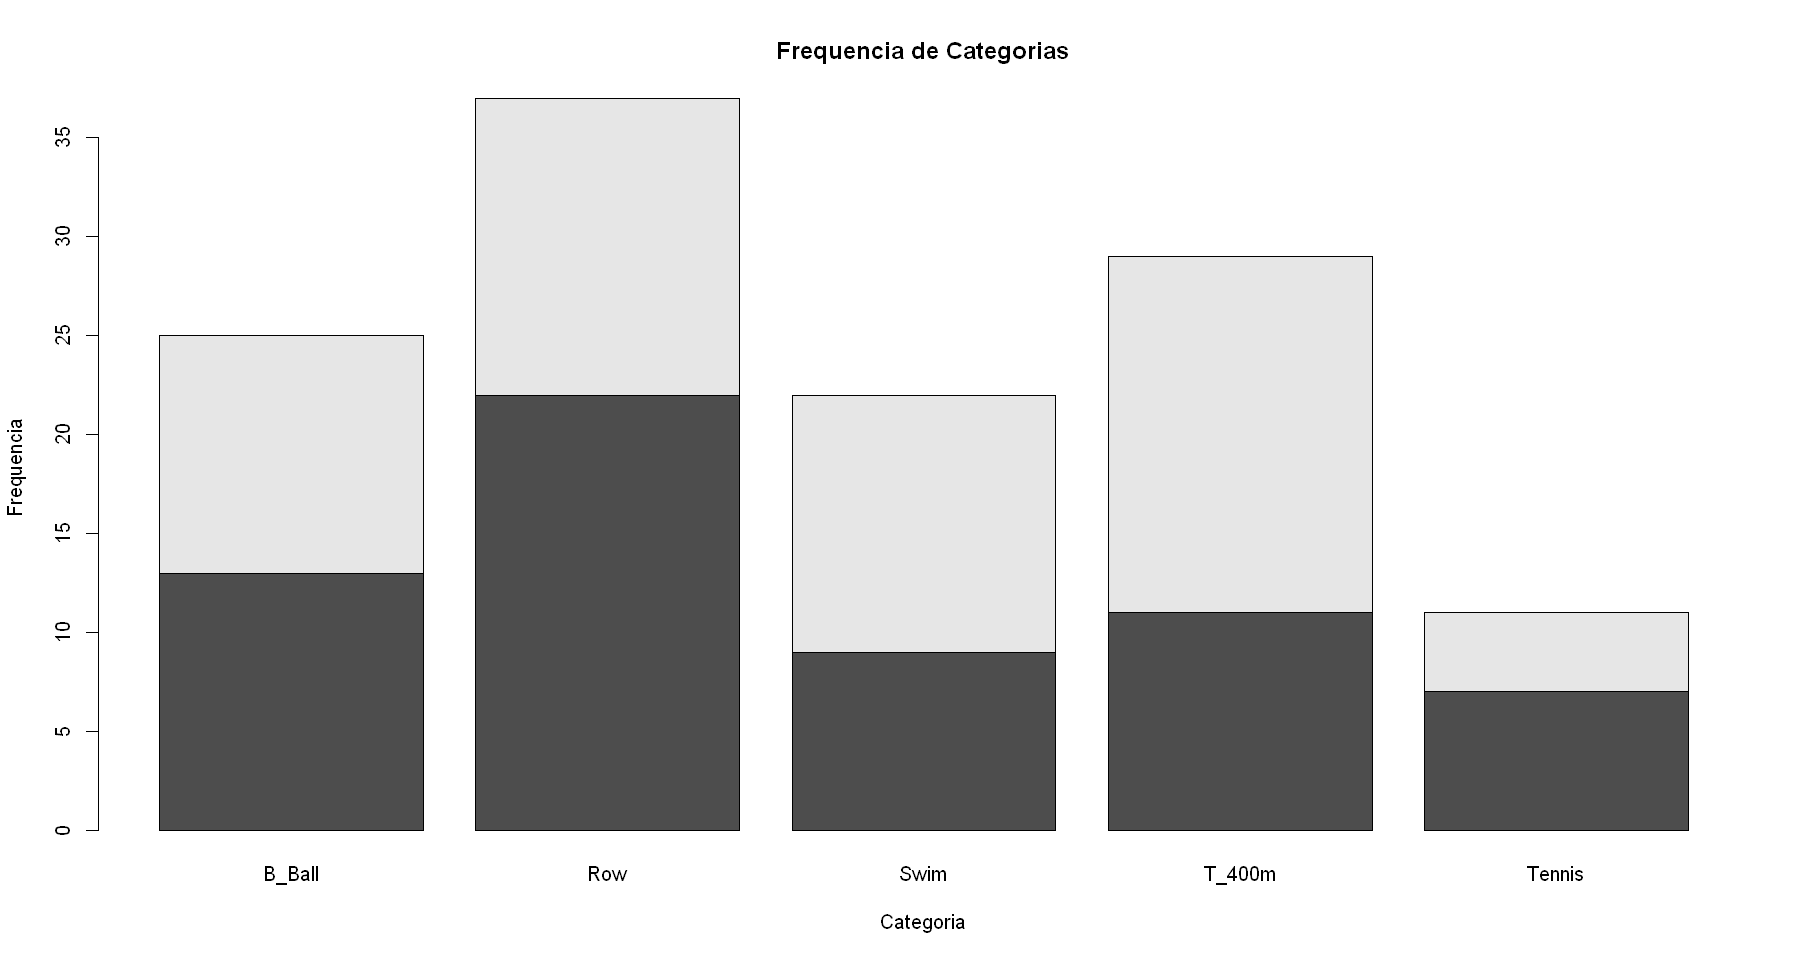

In [57]:
barplot(Conteo_grupo, main = "Frequencia de Categorias", xlab = "Categoria", ylab = "Frequencia")

In [58]:
prop_grupo <- prop.table(Conteo_grupo)

# Display the proportion table
print(prop_grupo)

   sport
sex     B_Ball        Row       Swim     T_400m     Tennis
  f 0.10483871 0.17741935 0.07258065 0.08870968 0.05645161
  m 0.09677419 0.12096774 0.10483871 0.14516129 0.03225806


A simple vista podemos observar que las proporciones para todos los deportes son bastante parejas.

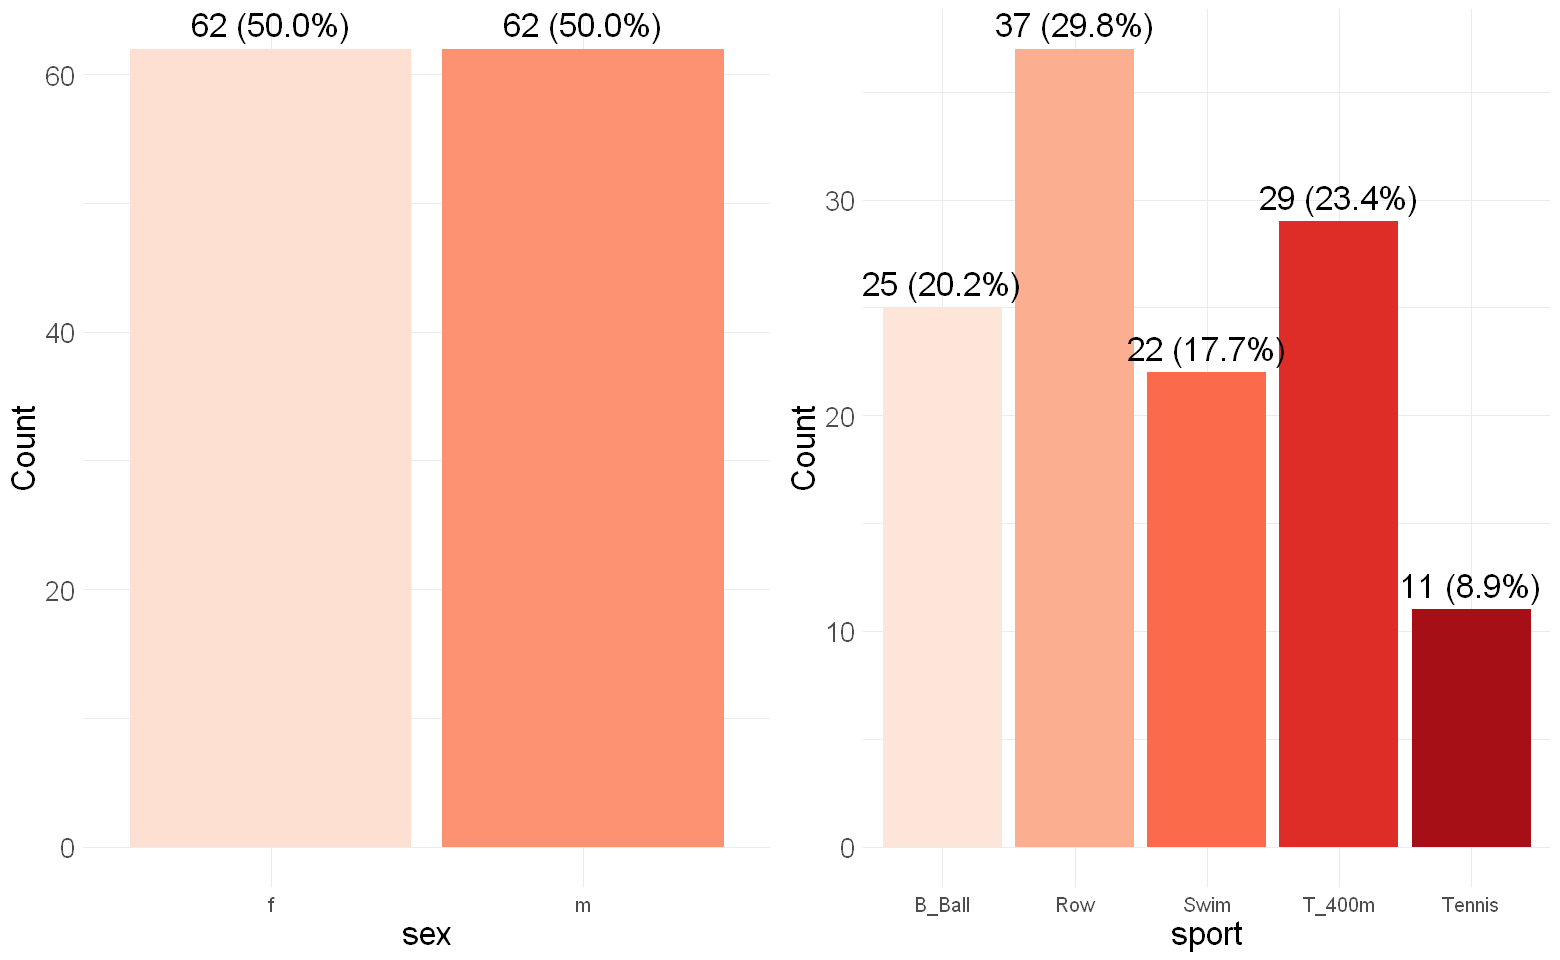

In [59]:
options(
  repr.plot.width = 13,  
  repr.plot.height = 8 
)
bar_plots = list()
var_data_cat_list = data_cat[col_cat]
var_data_cat = lapply(var_data_cat_list, list)

for (variable in names(var_data_cat)) {
  bar_plot = ggplot(data_cat, aes(x = !!sym(variable), fill = as.factor(!!sym(variable)))) +
    geom_bar(stat = 'count', position = 'dodge') +
    scale_fill_brewer(palette = 'Reds') + 
    labs( x = variable, y = 'Count') +
    theme_minimal() +
    theme(legend.position = 'none', text = element_text(size = 20),axis.text.x = element_text(size = 12)) +
    geom_text(
      stat = 'count',
      aes(label = sprintf('%d (%.1f%%)', after_stat(count), after_stat(count) / sum(after_stat(count)) * 100)),
      position = position_dodge(0.9),
    vjust = -0.5,
    size=7
    )
  
  bar_plots[[variable]] = bar_plot
}

grid.arrange(grobs = bar_plots, ncol = 2, widths = rep(1, 2))

Tenemos una distribución por categoria "sex" balanceada 50% - 50% pero para la categoria "sport" esta claramente desbalanceada. 

## <font color='#ED45A6'>  3. ANÁLISIS MATRIZ COVARIANZAS </font>

In [60]:
round(cov(data_numericas), 3)

,rcc,wcc,hc,hg,bmi
rcc,0.168,0.101,1.143,0.429,0.173
wcc,0.101,1.920,0.835,0.281,0.256
hc,1.143,0.835,9.379,3.519,1.401
hg,0.429,0.281,3.519,1.442,0.618
bmi,0.173,0.256,1.401,0.618,4.448


In [61]:
round(cor(data_numericas), 3)

,rcc,wcc,hc,hg,bmi
rcc,1.000,0.178,0.912,0.871,0.201
wcc,0.178,1.000,0.197,0.169,0.087
hc,0.912,0.197,1.000,0.957,0.217
hg,0.871,0.169,0.957,1.000,0.244
bmi,0.201,0.087,0.217,0.244,1.000


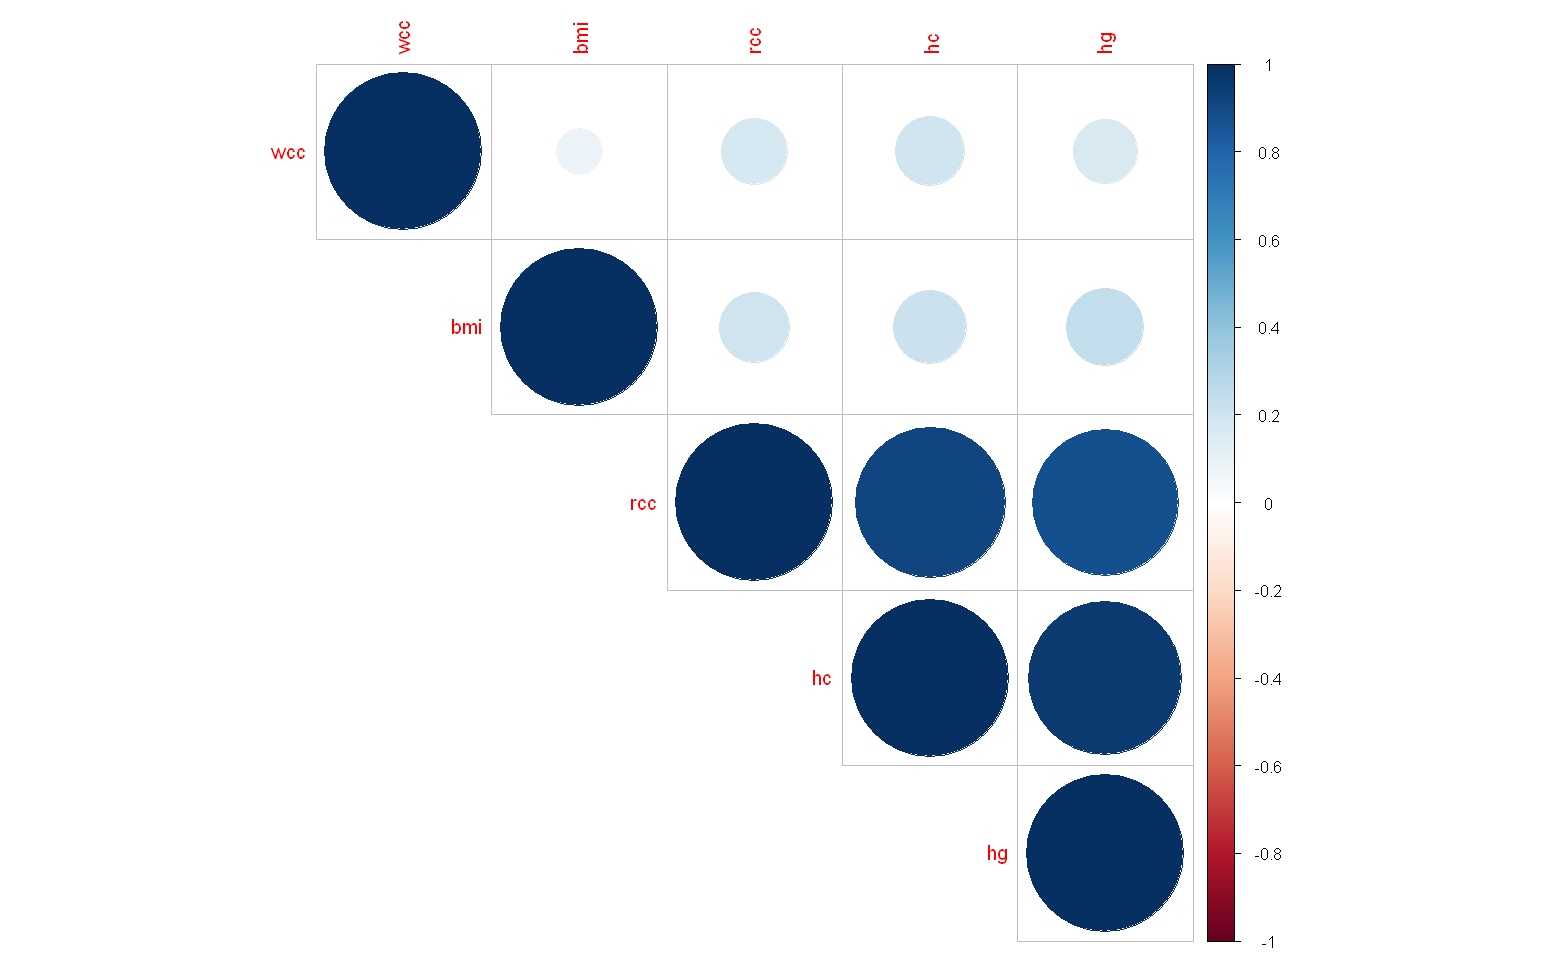

In [62]:
cor_matrix <- cor(data_numericas)
corrplot(cor_matrix, method = "circle", type = "upper", order = "hclust")

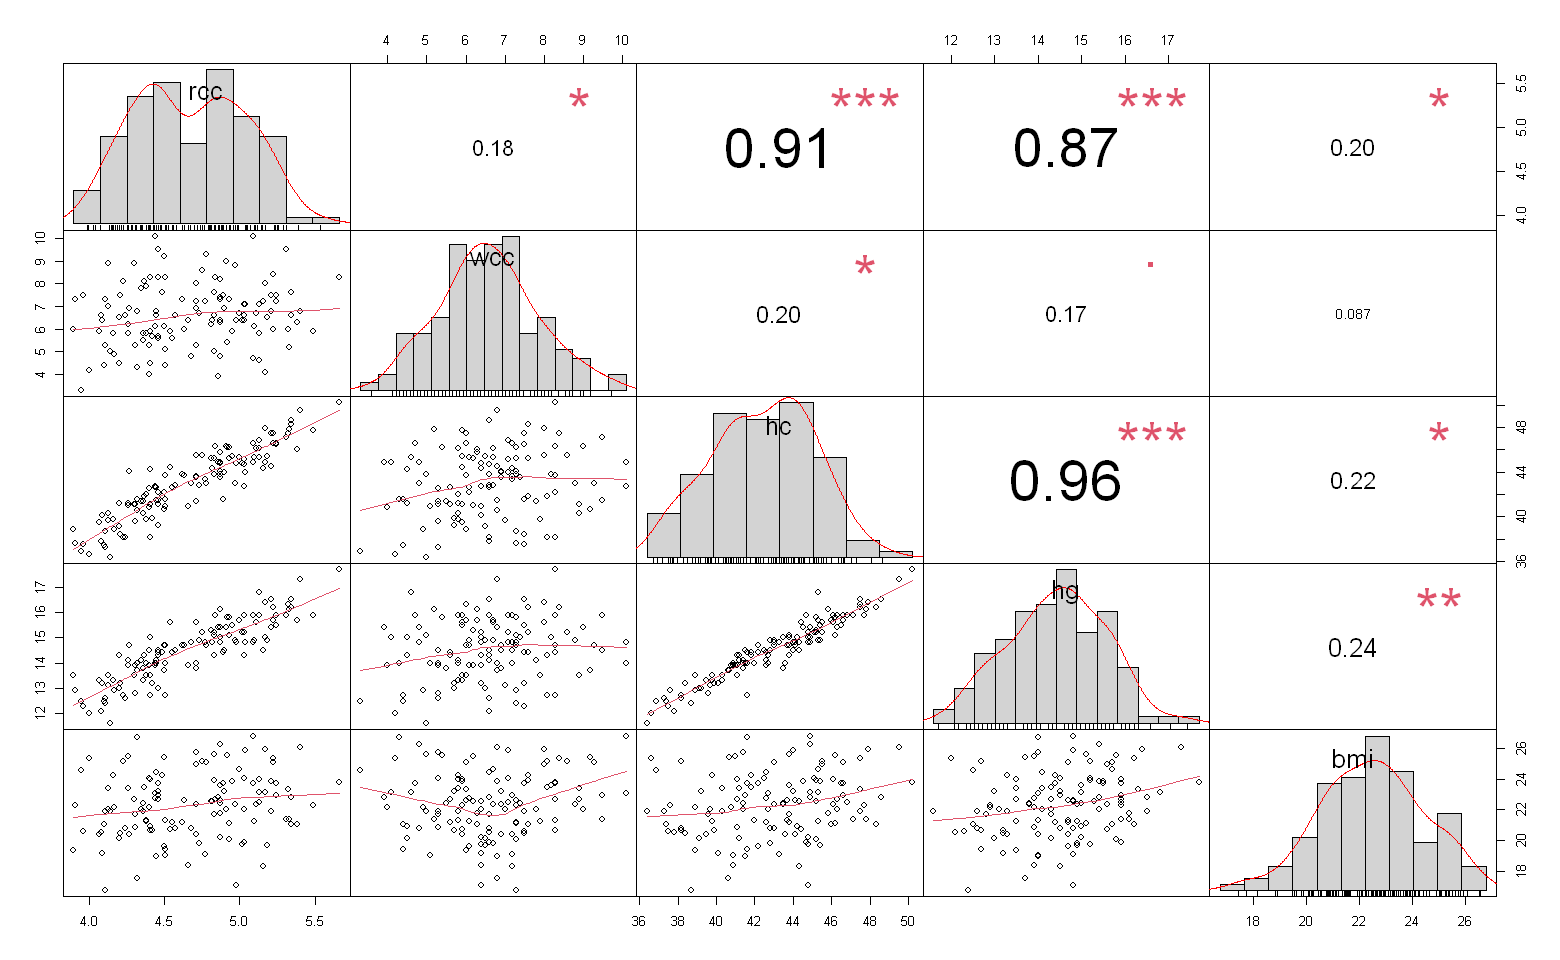

In [63]:
chart.Correlation(data_numericas, histogram = TRUE, method = "pearson")

En el gráfico de circulos observamos en azul oscuro las variables que más estan correlacionadas y con azul claro las que menos, y en el cuadro de correlaciones vemos el coeficiente de correlación. Para el ANOVA vamos a elegir las variables menos correlacionadas entre ellas que son wcc y bmi porque la independencia de las observaciones es un requisito clave para realizar un ANOVA válido.

# <font color='#ED45A6'>  4. REALIZAR TEST ANOVA </font>

# COMPROBACIÓN DE SUPUESTOS

- **Independencia en las muestras**: muestras tomadas de forma independiente sin depende de ninguna otra observación. 
- **Distribución normal** por categorías
- **Homocedasticidad** entre grupos

# NORMALIDAD factor sex


Para comprobar la normalidad haremos el test de Shapiro-Wilk que se utiliza para evaluar si una muestra de datos proviene de una población con una distribución normal.

Las hipótesis nula (H0) y alternativa (H1) para el test de Shapiro-Wilk son:

-Hipótesis Nula (H0): La hipótesis nula afirma que la muestra sigue una distribución normal.

-Hipótesis Alternativa (H1): La hipótesis alternativa sugiere que la muestra no sigue una distribución normal.

In [64]:
variables = c('rcc','wcc','hc','hg','bmi')
categorias = c('f', 'm')
resultados <- data.frame(Variable = character(), Cat = character(), Shapiro = numeric(), PValor = numeric(), row.names = NULL)

for (variable in variables) {
  for (cat in categorias) {
    data_subset = subset(data, sex == cat)
    result = shapiro.test(data_subset[, variable])
    resultados = rbind(resultados, data.frame(Variable = variable, Cat = cat, Shapiro = result$statistic, PValor = round(result$p.value, 3)))
  }
}

print(resultados)

   Variable Cat   Shapiro PValor
W       rcc   f 0.9527609  0.018
W1      rcc   m 0.9796056  0.390
W2      wcc   f 0.9889641  0.852
W3      wcc   m 0.9871224  0.762
W4       hc   f 0.9822609  0.509
W5       hc   m 0.9917297  0.953
W6       hg   f 0.9853917  0.670
W7       hg   m 0.9881680  0.815
W8      bmi   f 0.9891767  0.862
W9      bmi   m 0.9737279  0.204


Los P-valores para todas las variables son mayores que el nivel de significancia (0.05) por lo tanto no tenemos evidencia suficiente para rechazar la hipótesis nula y concluimos que los datos pueden provenir de una distribución normal.

# NORMALIDAD factor sport

In [65]:
variables = c('rcc','wcc','hc','hg','bmi')
categorias = c('B_Ball', 'Row', 'Swim','T_400m','Tennis')
resultados = data.frame(Variable = character(), Cat = character(), Shapiro = numeric(), PValor = numeric(), row.names = NULL)

for (variable in variables) {
  for (cat in categorias) {
    data_subset = subset(data, sport == cat)
    result = shapiro.test(data_subset[, variable])
    resultados = rbind(resultados, data.frame(Variable = variable, Cat = cat, Shapiro = result$statistic, PValor = round(result$p.value, 3)))
  }
}

print(resultados)

    Variable    Cat   Shapiro PValor
W        rcc B_Ball 0.9668856  0.568
W1       rcc    Row 0.9659142  0.309
W2       rcc   Swim 0.9164542  0.064
W3       rcc T_400m 0.9755527  0.717
W4       rcc Tennis 0.9602871  0.775
W5       wcc B_Ball 0.9627397  0.472
W6       wcc    Row 0.9608115  0.214
W7       wcc   Swim 0.9621063  0.533
W8       wcc T_400m 0.9536983  0.228
W9       wcc Tennis 0.9146806  0.277
W10       hc B_Ball 0.9677765  0.589
W11       hc    Row 0.9884984  0.962
W12       hc   Swim 0.9381614  0.181
W13       hc T_400m 0.9613755  0.355
W14       hc Tennis 0.9783319  0.956
W15       hg B_Ball 0.9583881  0.383
W16       hg    Row 0.9782721  0.671
W17       hg   Swim 0.9457531  0.260
W18       hg T_400m 0.9780738  0.787
W19       hg Tennis 0.9399817  0.520
W20      bmi B_Ball 0.9694488  0.631
W21      bmi    Row 0.9622123  0.237
W22      bmi   Swim 0.9827718  0.954
W23      bmi T_400m 0.9578281  0.290
W24      bmi Tennis 0.9655063  0.838


Los P-valores para todas las variables son mayores que el nivel de significancia (0.05) por lo tanto no tenemos evidencia suficiente para rechazar la hipótesis nula y concluimos que los datos pueden provenir de una distribución normal.

# HOMOCEDASTICIDAD factor sex

Para evaluar la homogeneidad de varianzas entre múltiples grupos haremos el test de Bartlett. La hipótesis nula (H0) y la hipótesis alternativa (H1) para el test de Bartlett son:

Hipótesis Nula (H0): La hipótesis nula afirma que las varianzas de las poblaciones son iguales, es decir, que hay homogeneidad de varianzas.

Hipótesis Alternativa (H1): La hipótesis alternativa sugiere que al menos una de las varianzas de las poblaciones es diferente de las otras, es decir, que hay heterogeneidad de varianzas.

In [66]:
variables = c('rcc','wcc','hc','hg','bmi')
resultados_bartlett = data.frame(Variable = character(), Estadistico = numeric(), PValor = numeric(), row.names = NULL)

for (variable in variables) {
  resultado_bartlett = bartlett.test(get(variable) ~ sex, data = data)
  resultados_bartlett = rbind(resultados_bartlett, data.frame(Variable = variable, Estadistico = resultado_bartlett$statistic, PValor = resultado_bartlett$p.value))
}

print(resultados_bartlett)

                      Variable Estadistico    PValor
Bartlett's K-squared       rcc   0.1046790 0.7462853
Bartlett's K-squared1      wcc   0.1205474 0.7284416
Bartlett's K-squared2       hc   1.0434306 0.3070249
Bartlett's K-squared3       hg   0.4223403 0.5157716
Bartlett's K-squared4      bmi   0.2849915 0.5934481


# HOMOCEDASTICIDAD factor sport

In [67]:
variables = c('rcc','wcc','hc','hg','bmi')
resultados_bartlett = data.frame(Variable = character(), Estadistico = numeric(), PValor = numeric(), row.names = NULL)

for (variable in variables) {
  resultado_bartlett = bartlett.test(get(variable) ~ sport, data = data)
  resultados_bartlett = rbind(resultados_bartlett, data.frame(Variable = variable
                                                              , Estadistico = resultado_bartlett$statisti
                                                              , PValor = resultado_bartlett$p.value))
}

print(resultados_bartlett)

                      Variable Estadistico    PValor
Bartlett's K-squared       rcc   2.7209300 0.6055571
Bartlett's K-squared1      wcc   0.9647336 0.9150955
Bartlett's K-squared2       hc   2.4492440 0.6537469
Bartlett's K-squared3       hg   5.1199980 0.2752051
Bartlett's K-squared4      bmi   4.3053131 0.3662603


Los P-valores para todas las variables son mayores que el nivel de significancia (0.05) por lo tanto no tenemos evidencia suficiente para rechazar la hipótesis nula y concluimos que las varianzas de las poblaciones son iguales, es decir, que hay homogeneidad de varianzas para el factor sex y para el factor sport. 

# <font color='#ED45A6'>  One-Way ANOVA </font>

Vamos a calcular la prueba ANOVA One-Way para la variable 'sport' respecto a las variables independientes 'wcc' y 'bmi' por tener una baja correlación entre ellas. En el contexto de ANOVA, un p_valor bajo es preferible, ya que indica que hay evidencia estadística suficiente para rechazar la hipótesis nula de igualdad de medias.

-Hipótesis Nula (H0): La hipótesis nula afirma que no hay diferencias significativas entre las medias de los grupos. En otras palabras, todas las medias poblacionales son iguales.

-Hipótesis Alternativa (H1): La hipótesis alternativa sugiere que al menos una de las medias poblacionales es diferente de las otras. Esto implica que al menos un grupo tiene una media diferente del resto.

# Prueba ANOVA One-Way para la variable sport respecto a la variable independiente 'wcc'.

In [68]:
anova = aov(wcc ~ sport, data = data)
summary(anova)

             Df Sum Sq Mean Sq F value Pr(>F)
sport         4   9.45   2.363    1.24  0.298
Residuals   119 226.73   1.905               

Observamos que para la variable 'wcc' el P-valor es 0.298 (> 0.05) por lo tanto aceptamos la hipótesis nula y concluimos que no hay diferencias significativas entre las medias de los grupos. 

No haré el histograma ya que las barras quedan superpuestas, como quiero visualizar las medias y las distribuciones usaré el gráfico violín.

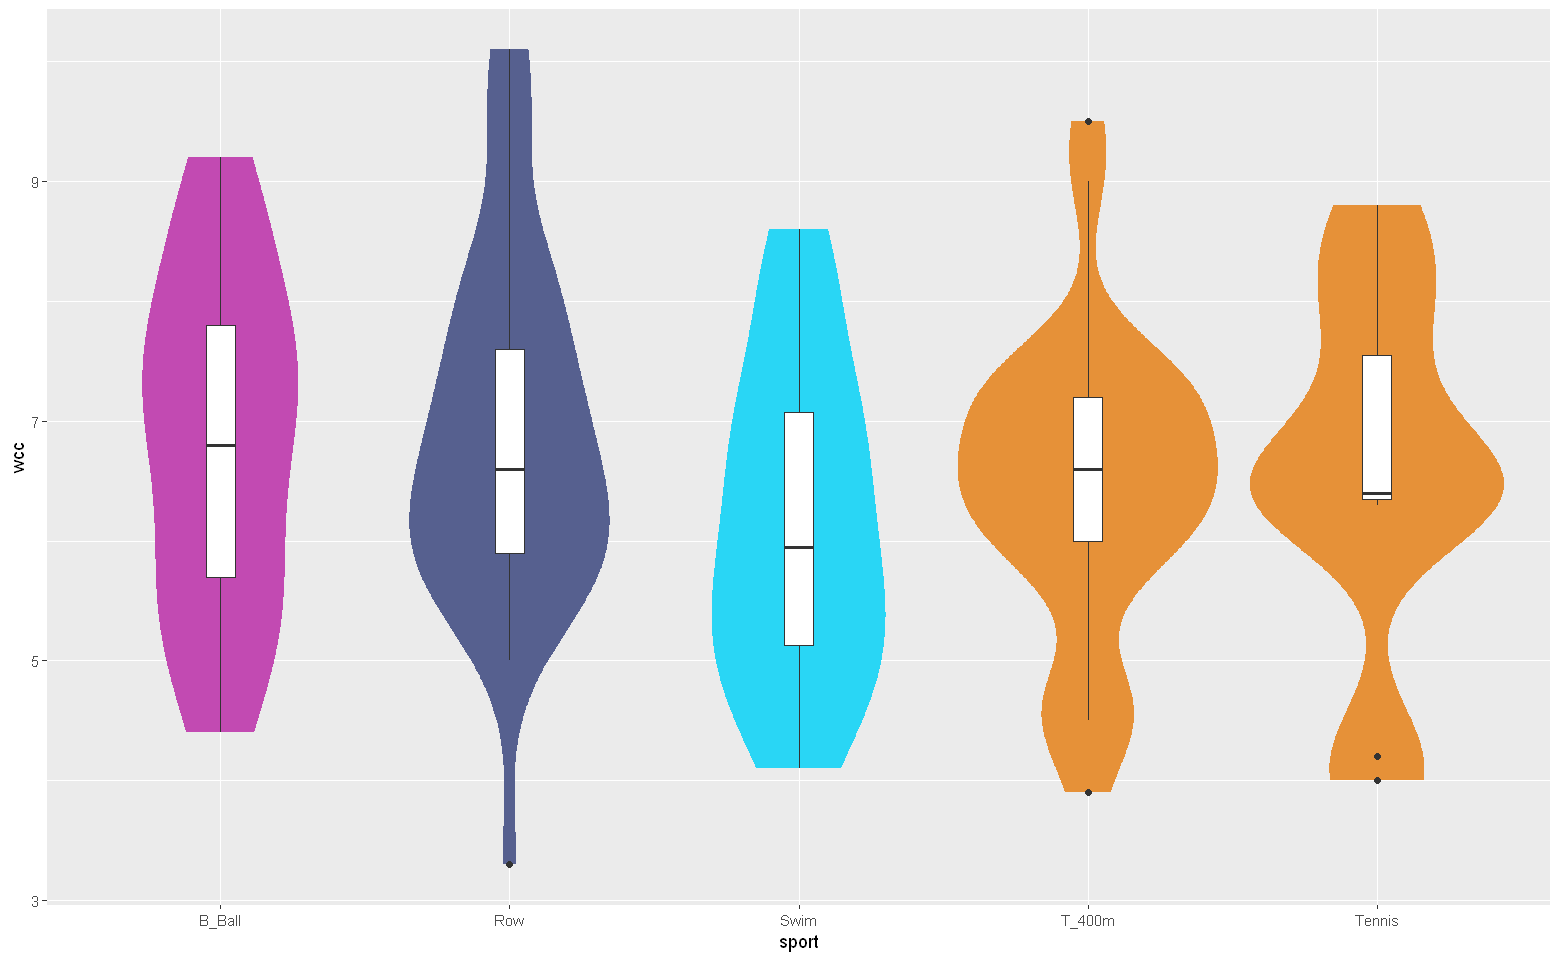

In [69]:
ggplot(data, aes(sport, wcc)) +
  geom_violin(color = NA,aes(fill = factor(sport))) +
  theme(legend.position = 'none') +
  geom_boxplot(width = 0.1) +
  scale_fill_manual(values = c('B_Ball' = '#C24AB2', 'Row' = '#56608F','Swim' = '#29D6F5', 'T_400m'= '#e69138', 'Tennis'= '#e69138'))

Observo que las medias de los grupos no muestran grandes diferencias en la Prueba ANOVA One-Way para el factor 'sport' y la variable 'wcc'.

# Prueba ANOVA One-Way para la variable sport respecto a la variable independiente 'bmi'.

In [70]:
anova = aov(bmi ~ sport, data = data)
summary(anova)

             Df Sum Sq Mean Sq F value   Pr(>F)    
sport         4  148.1   37.03   11.04 1.19e-07 ***
Residuals   119  398.9    3.35                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Para 'bmi', el P-valor asociado con la prueba es menor a 0.05 (nivel de significancia predefinido), rechazamos nuestra hipótesis nula y por lo tanto hay diferencia significativa entre grupos.

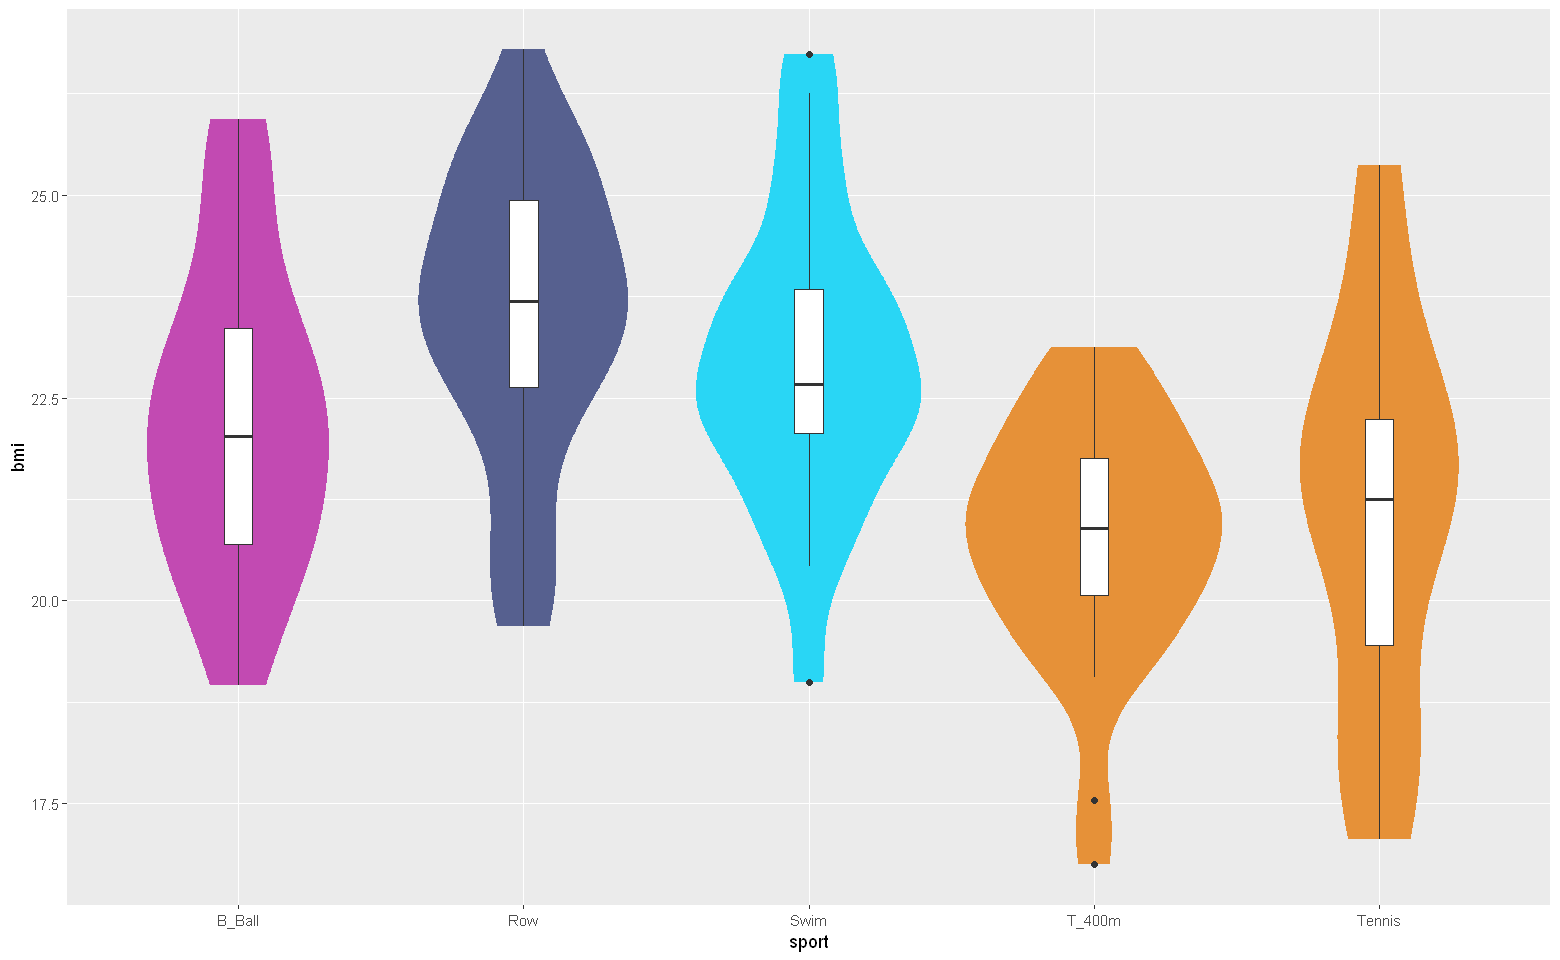

In [71]:
ggplot(data, aes(sport, bmi)) +
  geom_violin(color = NA,aes(fill = factor(sport))) +
  theme(legend.position = 'none') +
  geom_boxplot(width = 0.1) +
  scale_fill_manual(values = c('B_Ball' = '#C24AB2', 'Row' = '#56608F', 'Swim' = '#29D6F5', 'T_400m'= '#e69138', 'Tennis'= '#e69138'))

In [72]:
resultados_anova = data.frame(Variable = character(), F_Value = numeric(), P_Value = numeric(), row.names = NULL)
variables = c('rcc','wcc','hc','hg','bmi')
for (variable in variables) {
  formula = as.formula(paste(variable, '~ sport'))
  anova_result = aov(formula, data = data)
  
  # Extraer F value y p-value
  f_value = summary(anova_result)[[1]][['F value']][1]
  p_value = summary(anova_result)[[1]][['Pr(>F)']][1]
 resultados_anova = rbind(resultados_anova, data.frame(Variable = variable, F_Value = f_value, P_Value = p_value))
}

# Muestra los resultados de ANOVA
print(resultados_anova)

  Variable    F_Value      P_Value
1      rcc  0.6866758 6.025530e-01
2      wcc  1.2403660 2.975691e-01
3       hc  1.4525845 2.210388e-01
4       hg  1.2575485 2.906102e-01
5      bmi 11.0450579 1.187294e-07


Después de realizar el ANOVA concluimos que para todas las variables excepto 'bmi' el P-valor es mayor que 0.05 (nivel de significancia predefinido) por lo tanto aceptamos la hipótesis nula y concluimos que no hay diferencias significativas entre las medias de los grupos. En otras palabras, todas las medias poblacionales son iguales.

Sin embargo para 'bmi', el P-valor asociado con la prueba es menor a 0.05 (nivel de significancia predefinido),rechazamos  nuestra hipótesis nula y por lo tanto hay diferencia significativa entre grupos. 

# <font color='#ED45A6'> Two-Way ANOVA </font>

El ANOVA Two-Way para los factores 'sport' y 'sex' lo haré respecto a las variables continuas 'rcc' y 'hg' porque tienen la más baja correlación de las variables restantes, es decir, después de sacar 'wcc' y 'bmi' (las variables que usamos en el ejercicio anterior).

Hipótesis nulas H0:

- H0: No hay diferencia significativa entre las medias de las diferentes categorías del factor 'sport'
- H0: No hay diferencia significativa entre las medias de las diferentes categorías del factor 'sex'
- H0: No hay interacción entre los dos factores; es decir, los efectos de los factores en la variable dependiente son independientes entre sí.

Hipótesis alternativas HA:

- HA: Existe una diferencia significativa en la media de las diferentes categorías del factor 'sport'
- HA: Existe una diferencia significativa en la media de las diferentes categorías del factor 'sex'
- HA: Hay una interacción significativa entre los dos factores; es decir, los efectos de los factores en la variable dependiente son dependientes entre sí.

In [73]:
data_two = data[, c('sport','sex','rcc','wcc','hc','hg','bmi')]
head(data_two)

,sport,sex,rcc,wcc,hc,hg,bmi
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,B_Ball,f,3.96,7.5,37.5,12.3,20.56
2,B_Ball,f,4.41,8.3,38.2,12.7,20.67
3,B_Ball,f,4.14,5.0,36.4,11.6,21.86
4,B_Ball,f,4.11,5.3,37.3,12.6,21.88
5,B_Ball,f,4.45,6.8,41.5,14.0,18.96
6,B_Ball,f,4.10,4.4,37.4,12.5,21.04


# ANOVA Two-Way factor 'sport' y 'sex' respecto a la variable continua 'rcc'

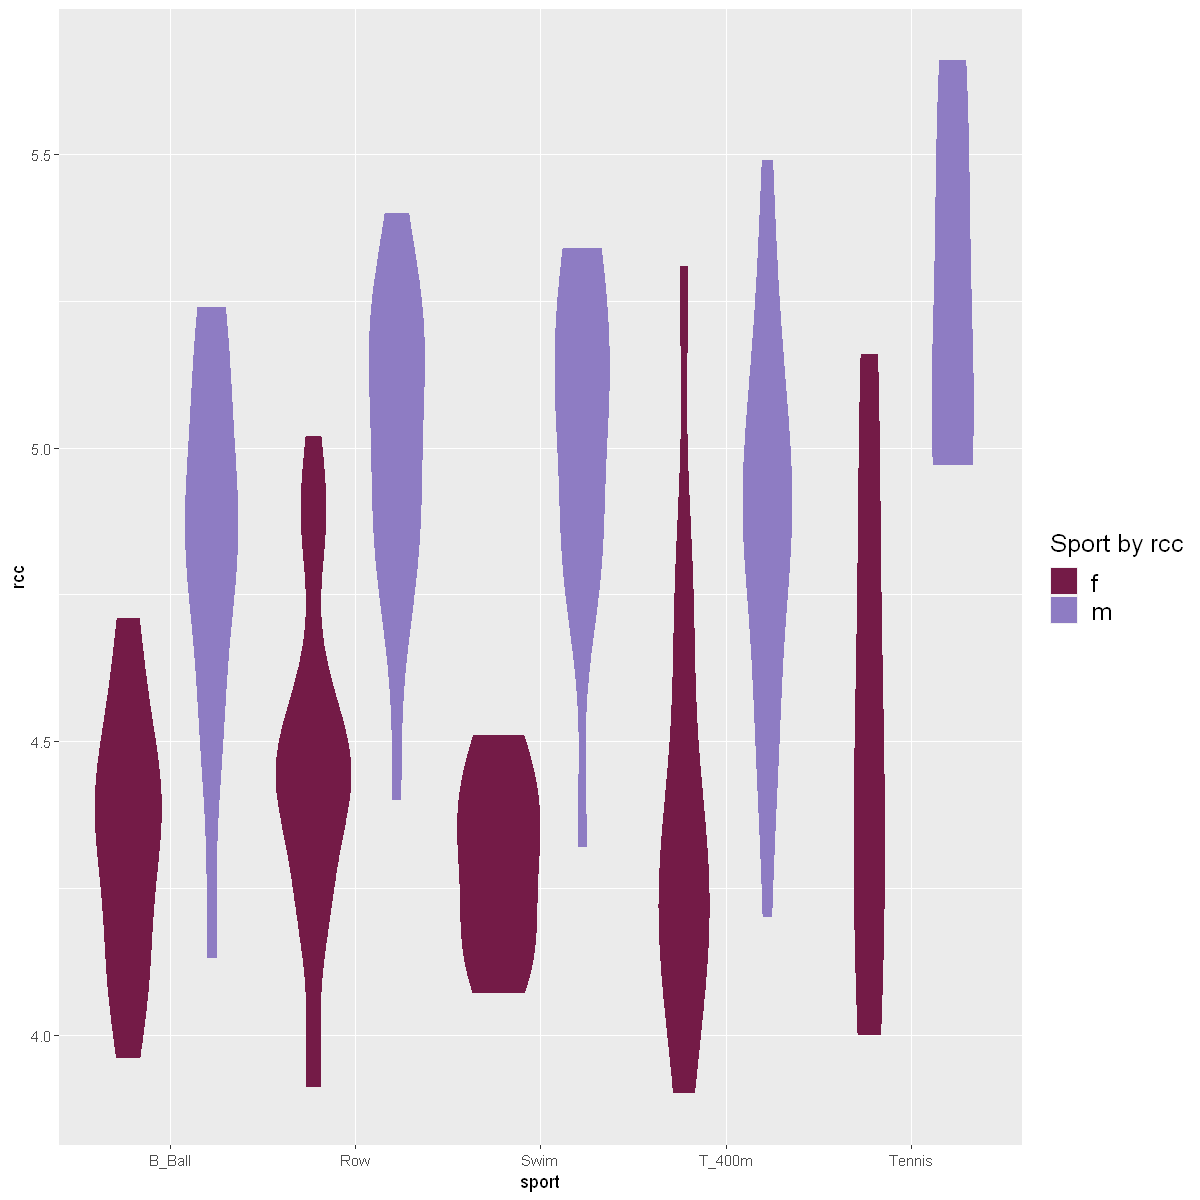

In [74]:
options(
  repr.plot.width = 10,  
  repr.plot.height = 10  
)
ggplot(data_two, aes(sport, rcc, fill = factor(sex))) +
  geom_violin(color = NA) +
  theme(legend.position = 'right'
        ,legend.text = element_text(size = 15)
        ,legend.title = element_text(size = 15)) +
  scale_fill_manual(values = c('f' = '#741b47', 'm' = '#8e7cc3')) +
  labs(fill = 'Sport by rcc')

In [75]:
anova = aov(rcc ~ sport * sex, data = data)
summary(anova)

             Df Sum Sq Mean Sq F value Pr(>F)    
sport         4  0.466   0.116   1.279  0.282    
sex           1  9.502   9.502 104.457 <2e-16 ***
sport:sex     4  0.297   0.074   0.815  0.518    
Residuals   114 10.370   0.091                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Resultado de nuestro Two-Way ANOVA con ambos factores (sex y sport) respecto a la variable continua 'rcc':

Confirmamos que el factor 'sport' respecto a la variable continua 'rcc' tiene un p_valor >0.05 entonces aceptamos la hipótesis nula lo que indica que "No hay diferencia significativa entre las medias de las diferentes categorías del factor 'sport' para la variable 'rcc'".

El factor 'sex' respecto a la variable continua 'rcc' tiene un p_valor < 0.05 entonces rechazamos la hipótesis nula lo que indica que "Hay diferencia significativa entre las medias de las diferentes categorías del factor 'sex' para la variable 'rcc'".

Los factores 'sport' y 'sex' juntos tienen un p_valor > 0.05 entonces aceptamos la hipótesis nula lo que significa que "No hay interacción entre los dos factores; es decir, los efectos de los factores en la variable continua 'rcc' son independientes entre sí".

# ANOVA Two-Way factor 'sport' y 'sex' respecto a la variable continua 'hg'.

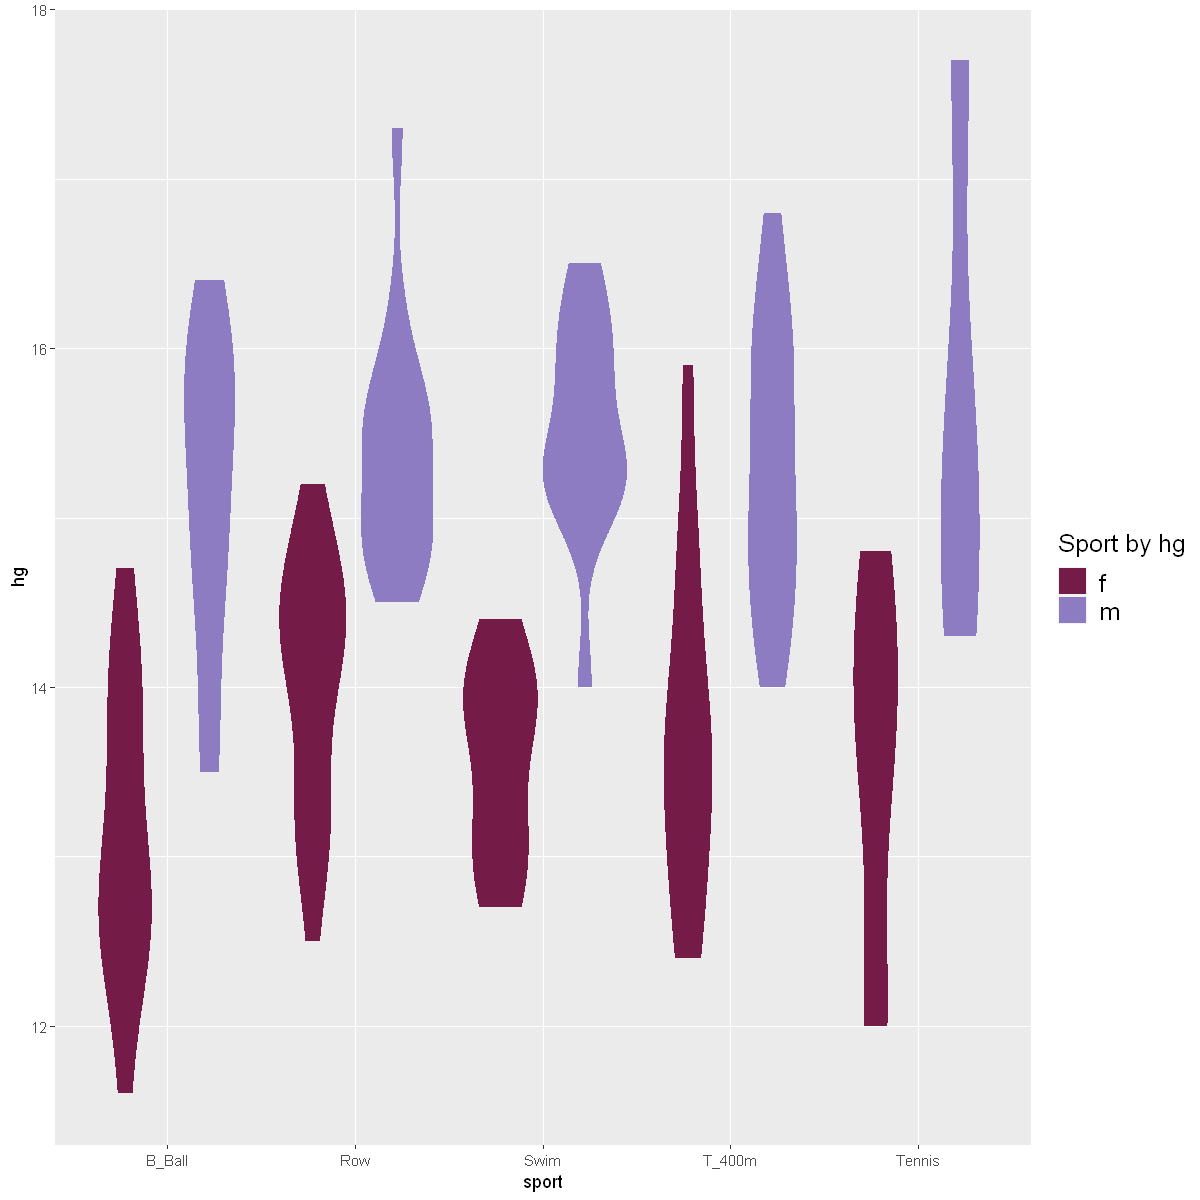

In [76]:
options(
  repr.plot.width = 10,  
  repr.plot.height = 10  
)
ggplot(data_two, aes(sport, hg, fill = factor(sex))) +
  geom_violin(color = NA) +
  theme(legend.position = 'right'
        ,legend.text = element_text(size = 15)
        ,legend.title = element_text(size = 15)) +
  scale_fill_manual(values = c('f' = '#741b47', 'm' = '#8e7cc3')) +
  labs(fill = 'Sport by hg')

In [77]:
anova = aov(hg ~ sport * sex, data = data)
summary(anova)

             Df Sum Sq Mean Sq F value Pr(>F)    
sport         4   7.20    1.80   2.529 0.0444 *  
sex           1  86.52   86.52 121.641 <2e-16 ***
sport:sex     4   2.62    0.65   0.920 0.4550    
Residuals   114  81.09    0.71                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Resultado de nuestro Two-Way ANOVA con ambos factores (sex y sport) respecto a la variable continua 'hg':

Confirmamos que el factor 'sport' respecto a la variable continua 'hg' tiene un p_valor 0.0444 (< 0.05) entonces rechazamos la hipótesis nula lo que indica que "Hay diferencia significativa entre las medias de las diferentes categorías del factor 'sport' para la variable 'hg'".

El factor 'sex' respecto a la variable continua 'hg' tiene un p_valor 2e-16 (< 0.05) entonces rechazamos la hipótesis nula lo que indica que "Hay diferencia significativa entre las medias de las diferentes categorías del factor 'sex' para la variable 'rcc'".

Los factores 'sport' y 'sex' juntos tienen un p_valor 0.4550 (> 0.05) entonces aceptamos la hipótesis nula lo que significa que "No hay interacción entre los dos factores; es decir, los efectos de los factores en la variable continua 'hg' son independientes entre sí".

# <font color='#ED45A6'> CONCLUSIONES </font>

El dataset se compone de un total de 124 observaciones y 7 variables. 2 variables categóricas 'sex' y 'sport' y 5 variables numéricas. Durante la fase descriptiva se pudo observar que a nivel de distribución de observaciones por factores para el factor 'sex' la distribución es balanceada y por factor 'sport' la distribución es desbalanceada y en el gráfico de correlación vemos que varias de las variables continuas presentaban una distribución Normal. 

Comprobamos los supuestos de normalidad y homocedasticidad antes de iniciar con el ANOVA. 

Para la prueba ANOVA One-Way para el factor 'sport' usamos las variables 'wcc' y 'bmi' por tener una baja correlación entre ellas. Observamos que para la variable 'wcc' el P-valor es 0.298 (> 0.05) por lo tanto aceptamos la hipótesis nula y concluimos que "No hay diferencias significativas entre las medias de los grupos". En cambio para el factor 'sport' y la variable 'bmi' el P-valor es 0.000000119 (< 0.05) por lo tanto rechazamos la hipótesis nula y concluimos que "hay diferencias significativas entre las medias de los grupos".

Para la prueba ANOVA Two-Way para los factores 'sport' y 'sex' usamos las variables 'rcc'y 'hg' por tener la más baja correlación después de las variables elegidas para el ANOVA One-Way.

Concluimos que con respecto al factor 'sport' no hay diferencia significativa entre las medias de las diferentes categorías del factor para la variable 'rcc', sin embargo hay diferencia significativa entre las medias de las diferentes categorías del factor 'sport' para la variable 'hg'.

Concluimos que con respecto al factor 'sex' hay diferencia significativa entre las medias de las diferentes categorías del factor para la variable 'rcc' y la variable 'hg'. 

Respecto de los factores 'sport' y 'sex' juntos concluimos que no hay interacción entre los dos factores; es decir, los efectos de los factores en la variable continua 'rcc' como para la variable 'hg'son independientes entre sí.
